In [1]:
#importing basic libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading all the datasets
geo = pd.read_csv('/content/drive/MyDrive/datasets/Geo_scores.csv')
lambdawts = pd.read_csv('/content/drive/MyDrive/datasets/Lambda_wts.csv')
qset = pd.read_csv('/content/drive/MyDrive/datasets/Qset_tats.csv')
instance = pd.read_csv('/content/drive/MyDrive/datasets/instance_scores.csv')
test = pd.read_csv('/content/drive/MyDrive/datasets/test_share.csv')
train = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')

In [3]:
#shape and columns in all datasets
print('Geo_scores shape :',geo.shape,'\n','Geo_scores columns :','\n',geo.columns)
print('------------------------------------')
print()
print('lambdawts shape :',lambdawts.shape,'\n','lambdawts columns :','\n',lambdawts.columns)
print('------------------------------------')
print()
print('qset shape :',qset.shape,'\n','qset columns :','\n',qset.columns)
print('------------------------------------')
print()
print('instance shape :',instance.shape,'\n','instance columns :','\n',instance.columns)
print('------------------------------------')
print()
print('test shape :',test.shape,'\n','test columns :','\n',test.columns)
print('------------------------------------')
print()
print('train shape :',train.shape,'\n','train columns :','\n',train.columns)


Geo_scores shape : (1424035, 2) 
 Geo_scores columns : 
 Index(['id', 'geo_score'], dtype='object')
------------------------------------

lambdawts shape : (1400, 2) 
 lambdawts columns : 
 Index(['Group', 'lambda_wt'], dtype='object')
------------------------------------

qset shape : (1424035, 2) 
 qset columns : 
 Index(['id', 'qsets_normalized_tat'], dtype='object')
------------------------------------

instance shape : (1424035, 2) 
 instance columns : 
 Index(['id', 'instance_scores'], dtype='object')
------------------------------------

test shape : (56962, 27) 
 test columns : 
 Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')
------------------------------------

train shape : (227845, 28) 
 train columns : 
 Index(['id', 'Group', 'Per1', 'Per2', 

In [4]:
#unique count in all datasets
print('Geo_scores unique :',geo.nunique())
print('------------------------------------')
print()
print('lambdawts unique :',lambdawts.nunique())
print('------------------------------------')
print()
print('qset unique :',qset.nunique())
print('------------------------------------')
print()
print('instance unique :',instance.nunique())
print('------------------------------------')
print()
print('test unique :',test.nunique())
print('------------------------------------')
print()
print('train unique :',train.nunique())

Geo_scores unique : id           284807
geo_score     25523
dtype: int64
------------------------------------

lambdawts unique : Group        1400
lambda_wt    1400
dtype: int64
------------------------------------

qset unique : id                      284807
qsets_normalized_tat     24832
dtype: int64
------------------------------------

instance unique : id                 284807
instance_scores     11158
dtype: int64
------------------------------------

test unique : id                56962
Group               915
Per1               1275
Per2               1586
Per3               1095
Per4               1069
Per5               1253
Per6               1092
Per7               1210
Per8               1265
Per9                916
Dem1                699
Dem2                696
Dem3                645
Dem4                716
Dem5                658
Dem6                715
Dem7                956
Dem8                910
Dem9                605
Cred1               809
Cred2            

In [5]:
#checking the unique values to concatinate the tables
print("geo id", geo['id'].nunique())
print()
print("instance id", instance['id'].nunique())
print()
print("Lambda Group", lambdawts['Group'].nunique())
print()
print("qset id", qset['id'].nunique())
print()
print("Test id", test['id'].nunique())
print()
print("Train Id", train['id'].nunique())
print()
print("Test Group", test['Group'].nunique())
print()
print("Train Group",train['Group'].nunique())

geo id 284807

instance id 284807

Lambda Group 1400

qset id 284807

Test id 56962

Train Id 227845

Test Group 915

Train Group 1301


In [6]:
#adding data column in train and test dataframe to caoncatinate and giving values so we can divide the data later
train['data'] = 'train'
test['data'] = 'test'

In [7]:
#sample of test dataset
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test


In [8]:
#sample of train dataset
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [9]:
#concatinating the train and test dataframe
trn_tst = pd.concat([train, test], axis = 0)
print(trn_tst.columns)
trn_tst.shape

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')


(284807, 29)

In [10]:
trn_tst.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [11]:
trn_tst.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [12]:
#checking the unique values in id and group column
print("train and test data id ",trn_tst['id'].nunique())
print('-------------------------------')
print("train and test data id ",trn_tst['Group'].nunique())

train and test data id  284807
-------------------------------
train and test data id  1400


In [13]:
#checking the null values from all dataframe
print(geo.isnull().sum())
print('-----------------------------')
print(instance.isnull().sum())
print('-----------------------------')
print(lambdawts.isnull().sum())
print('-----------------------------')
print(qset.isnull().sum())
print('-----------------------------')
print(trn_tst.isnull().sum())


id               0
geo_score    71543
dtype: int64
-----------------------------
id                 0
instance_scores    0
dtype: int64
-----------------------------
Group        0
lambda_wt    0
dtype: int64
-----------------------------
id                           0
qsets_normalized_tat    103201
dtype: int64
-----------------------------
id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target  

In [14]:
#analysing the summery of the geo dataframe for handling missing values
geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


In [15]:
#analysing the summery of the qset  dataframe for handling missing values
qset.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


In [16]:
#handling missing values with median
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [17]:
geo.isnull().sum()
qset.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [18]:
print('shape :',geo.shape)
print('unique : ',geo['id'].nunique())


shape : (1424035, 2)
unique :  284807


In [19]:
geo = geo.groupby('id').mean()
print('geo shape :',geo.shape)
print('------'*10)
qset = qset.groupby('id').mean()
print('qset shape :',qset.shape)
print('------'*10)
instance = instance.groupby('id').mean()
print('instance shape :',instance.shape)

geo shape : (284807, 1)
------------------------------------------------------------
qset shape : (284807, 1)
------------------------------------------------------------
instance shape : (284807, 1)


In [20]:
trn_tst_geo = pd.merge(trn_tst, geo, on='id', how='left')

In [21]:
trn_tst_geo.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250


In [22]:
instance.head(2)

,instance_scores
id,
0,0.09
1,-0.17


In [23]:
trn_tst_geo_instance = pd.merge(trn_tst_geo,instance , on='id', how='left')

In [24]:
qset.head(2)

,qsets_normalized_tat
id,
0,0.214
1,-0.110


In [25]:
trn_tst_geo_instance_qset = pd.merge(trn_tst_geo_instance,qset , on='id', how='left')

In [26]:
trn_tst_geo_instance_qset.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,0.256,-0.06,-0.70
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,-0.250,0.52,0.14


In [27]:
lambdawts.head(2)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88


In [28]:
print(lambdawts.shape)
lambdawts['Group'].nunique()

(1400, 2)


1400

In [29]:
all_data = pd.merge(trn_tst_geo_instance_qset,lambdawts , on='Group', how='left')

In [30]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [31]:
all_data['lambda_wt'].count()

284807

In [32]:
all_data['lambda_wt'].nunique()

1400

In [33]:
train_data = all_data[all_data['data']=='train']
test_data = all_data[all_data['data']=='test']

In [34]:
print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)

train data shape : (227845, 33)
test data shape : (56962, 33)


In [35]:
# splitting the data into independent and dependent variable
x = train_data.drop(['id', 'Group','Target', 'data'], axis=1) # ind variable
y = train_data['Target'] # dependent

In [36]:
x.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score', 'instance_scores', 'qsets_normalized_tat', 'lambda_wt'],
      dtype='object')

In [37]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [38]:
test_data.isnull().sum()/len(test_data)*100

id                        0.0
Group                     0.0
Per1                      0.0
Per2                      0.0
Per3                      0.0
Per4                      0.0
Per5                      0.0
Per6                      0.0
Per7                      0.0
Per8                      0.0
Per9                      0.0
Dem1                      0.0
Dem2                      0.0
Dem3                      0.0
Dem4                      0.0
Dem5                      0.0
Dem6                      0.0
Dem7                      0.0
Dem8                      0.0
Dem9                      0.0
Cred1                     0.0
Cred2                     0.0
Cred3                     0.0
Cred4                     0.0
Cred5                     0.0
Cred6                     0.0
Normalised_FNT            0.0
Target                  100.0
data                      0.0
geo_score                 0.0
instance_scores           0.0
qsets_normalized_tat      0.0
lambda_wt                 0.0
dtype: flo

In [39]:
test_data = test_data.drop(['id','Group','Target','data'], axis=1)

In [40]:
test_data.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


In [41]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [42]:
x.isnull().sum()

Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
geo_score               0
instance_scores         0
qsets_normalized_tat    0
lambda_wt               0
dtype: int64

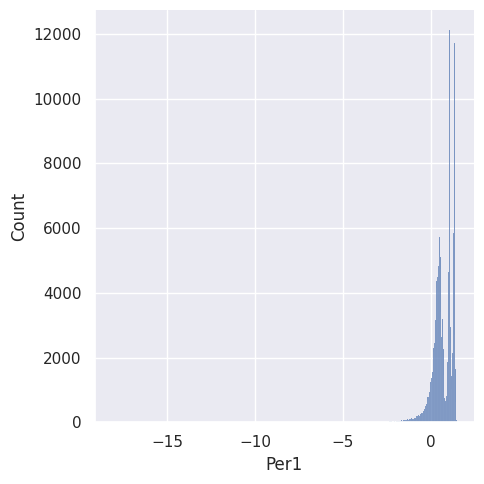

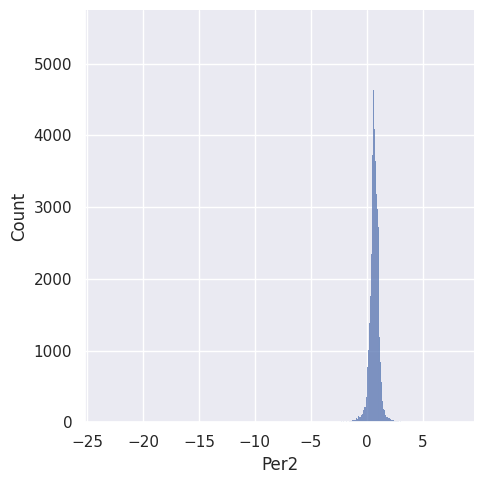

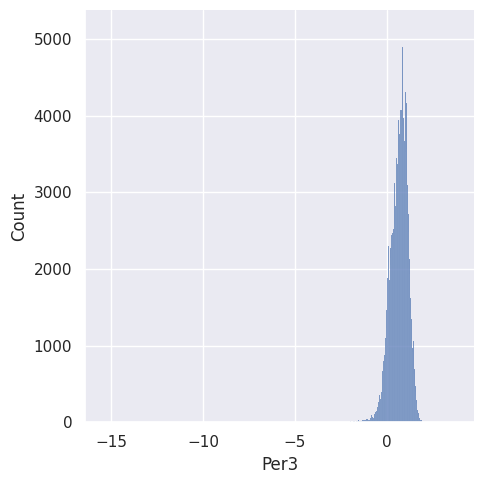

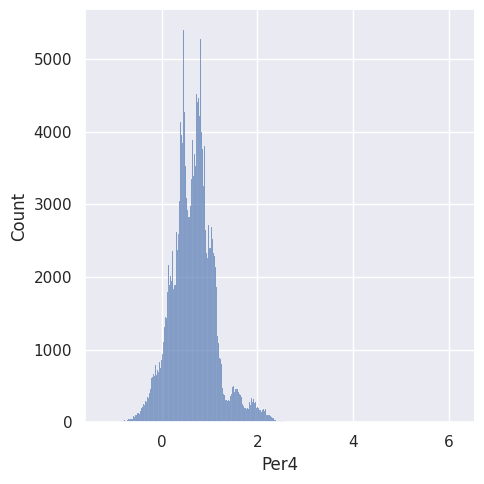

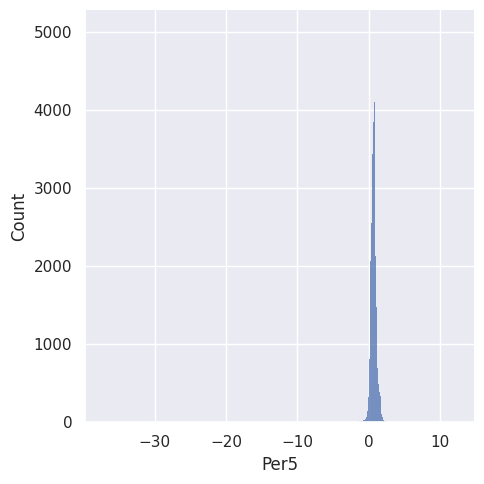

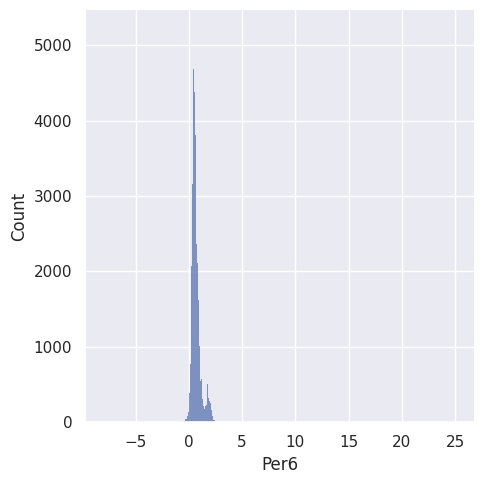

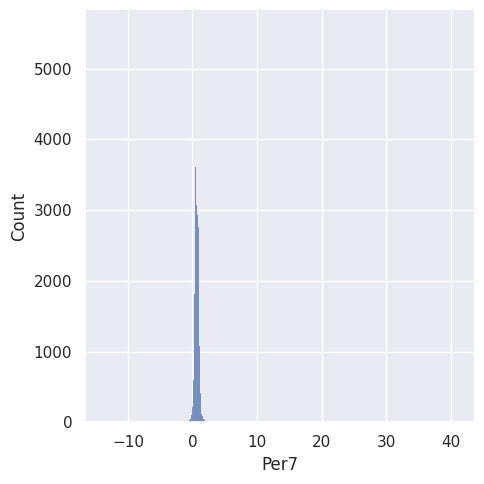

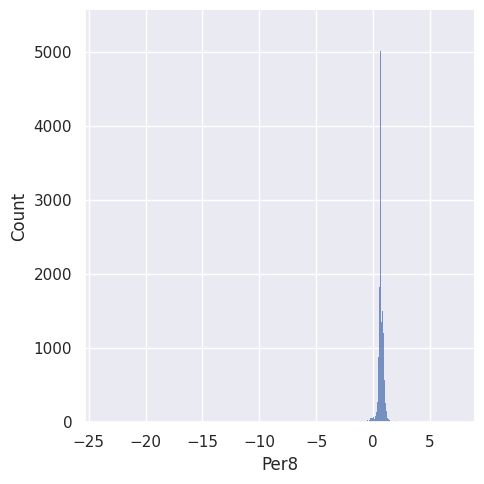

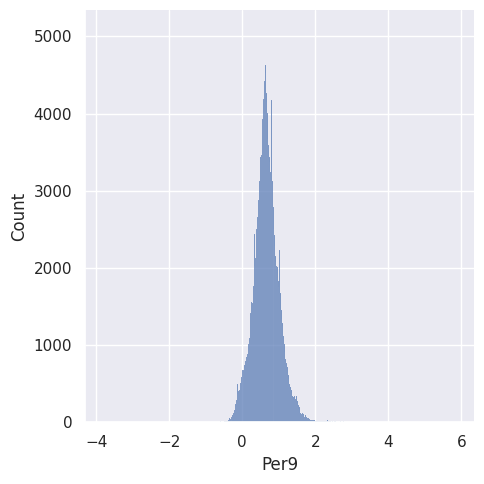

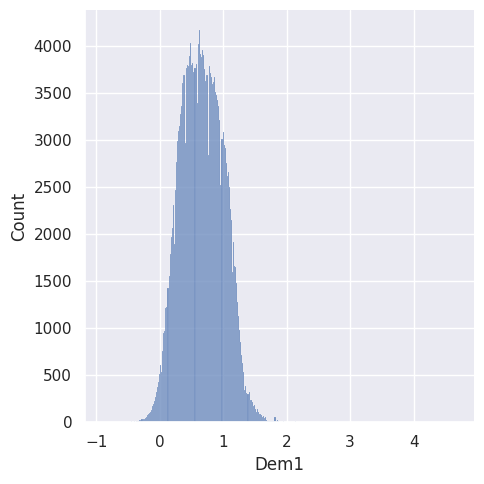

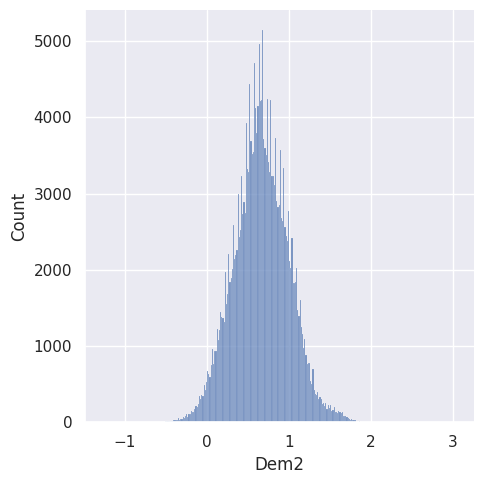

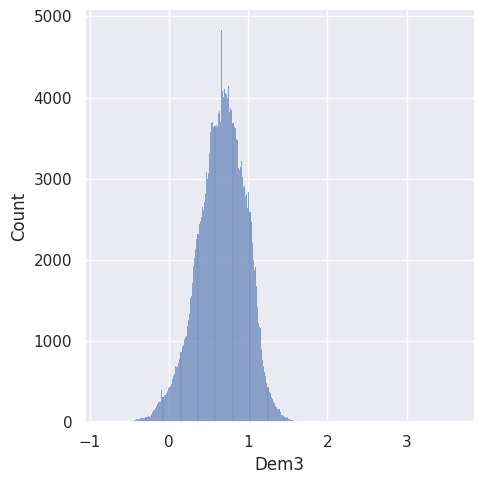

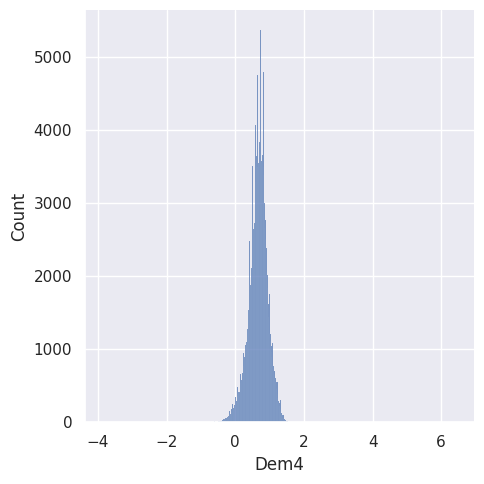

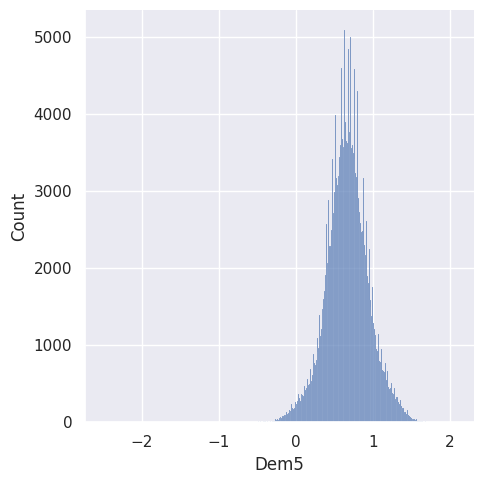

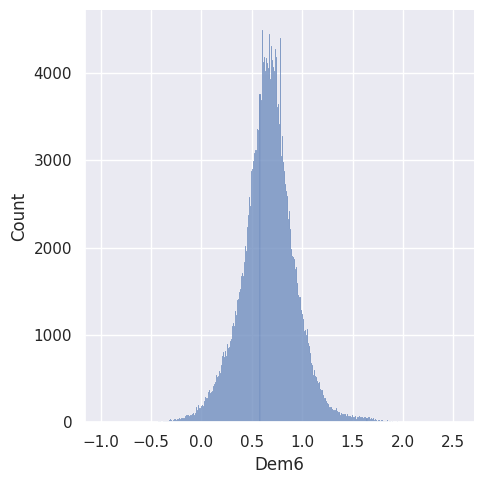

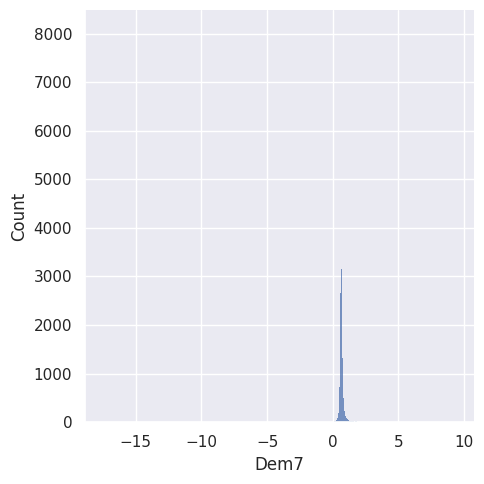

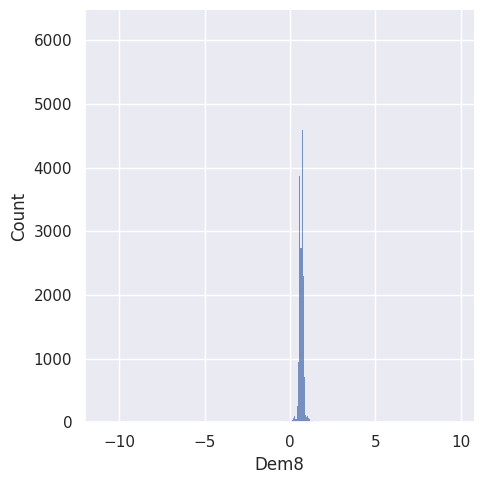

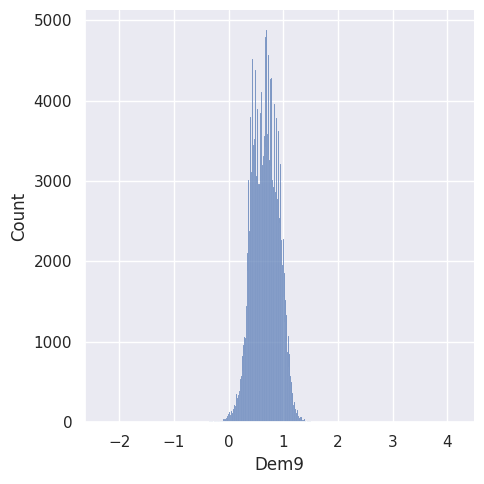

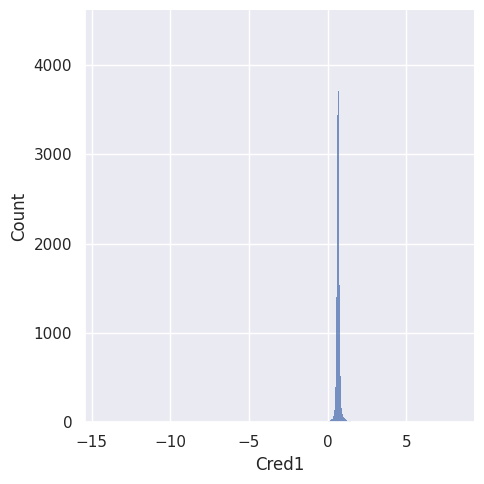

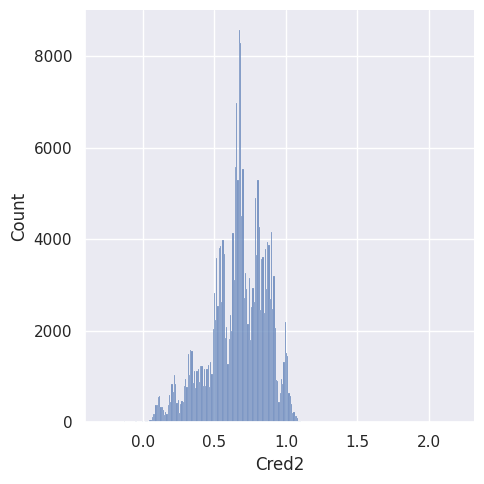

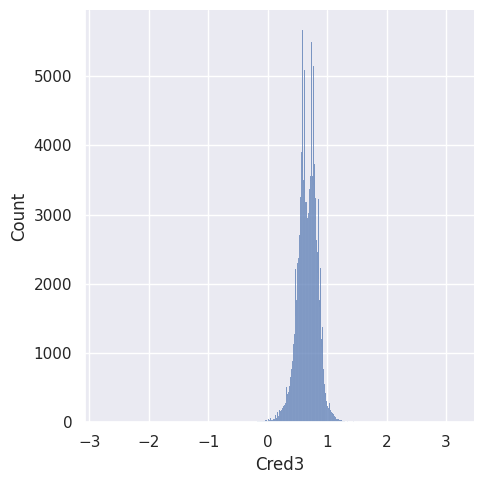

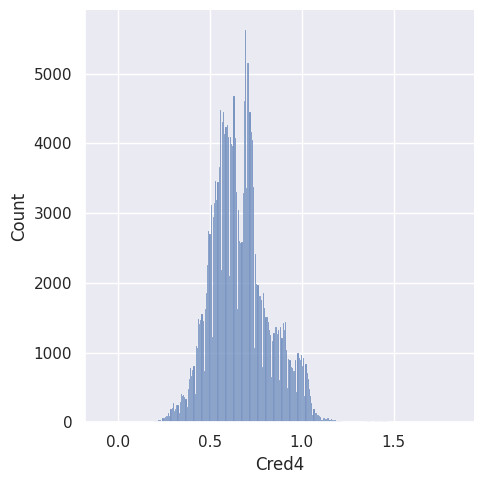

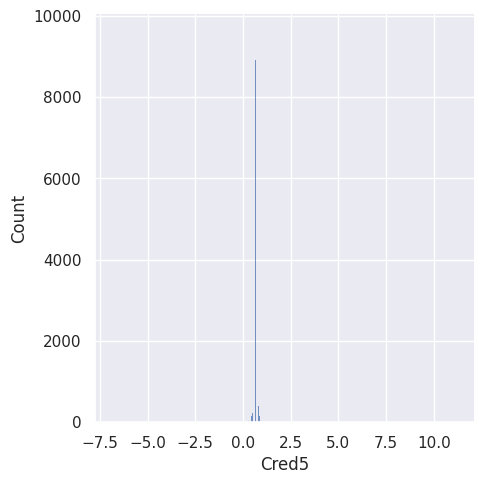

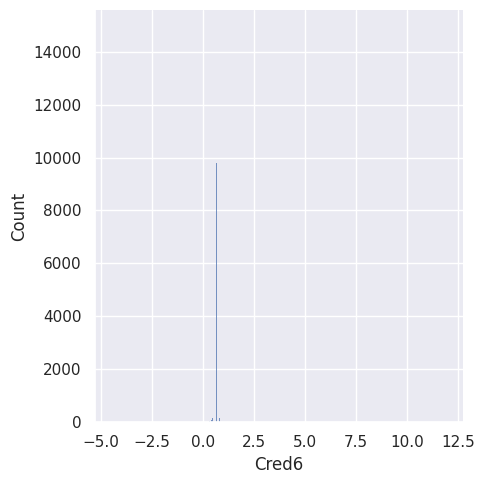

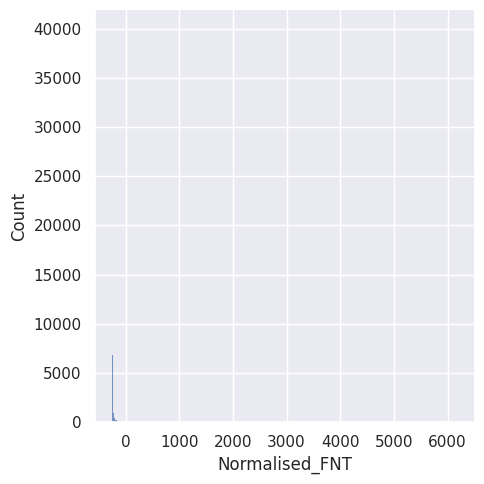

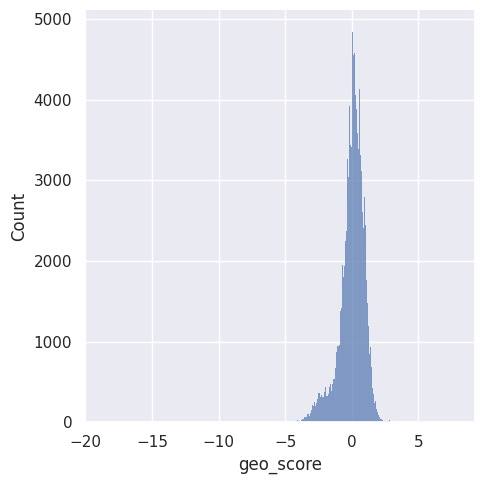

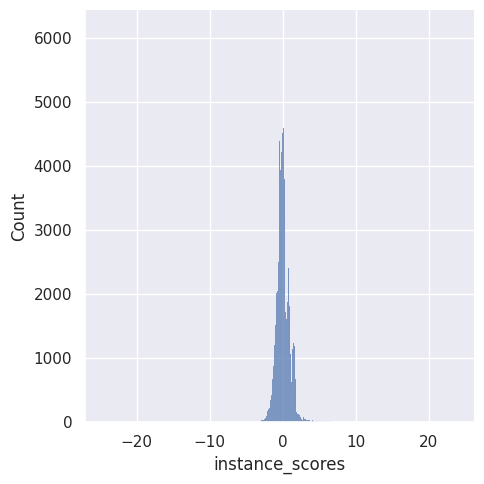

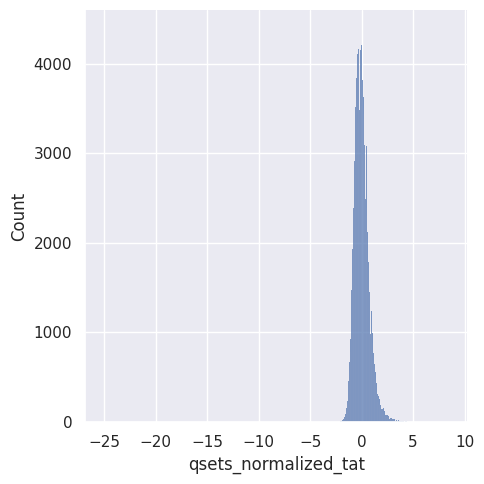

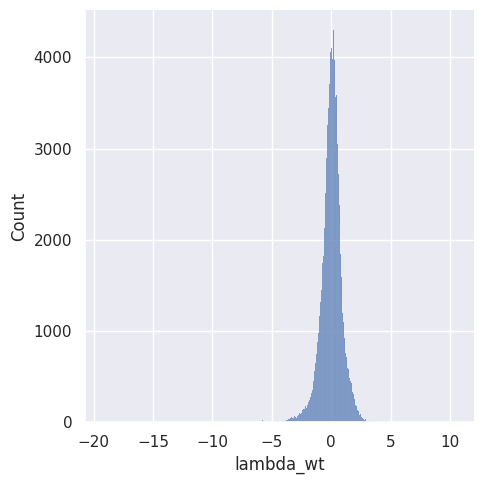

In [43]:
def distplots(col):
  sns.displot(x[col])
  plt.show()

for i in list(x.columns)[0:]:
  distplots(i)

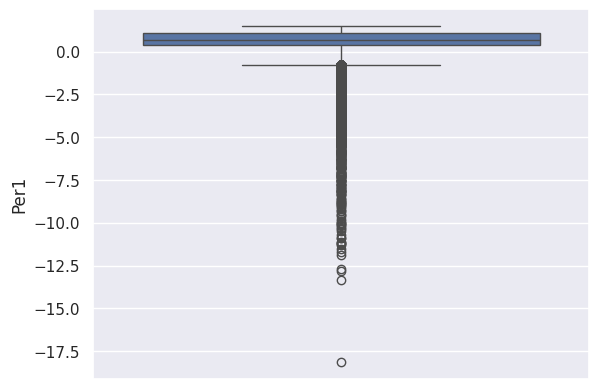

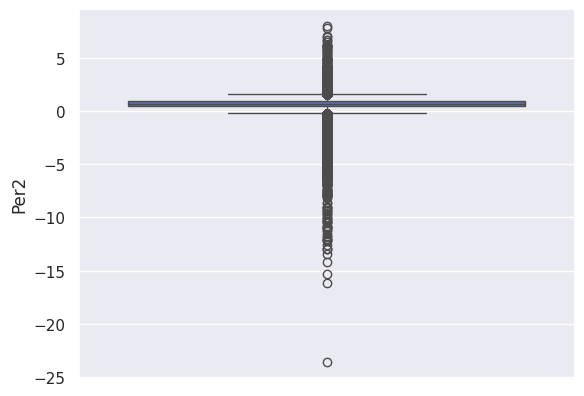

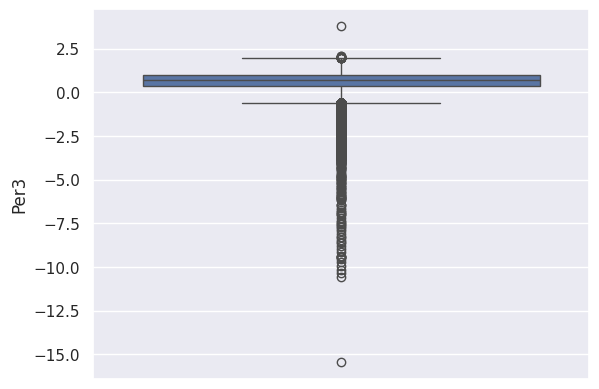

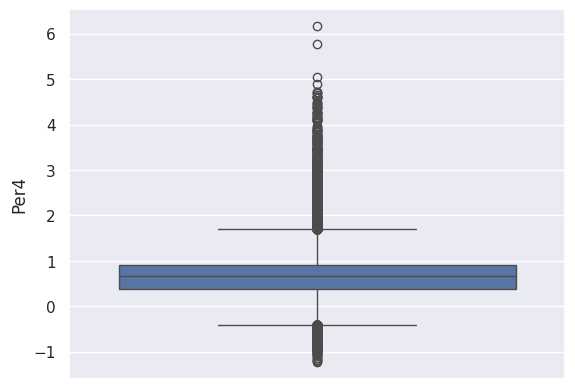

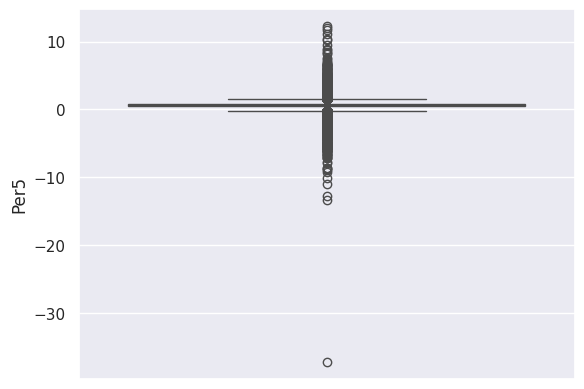

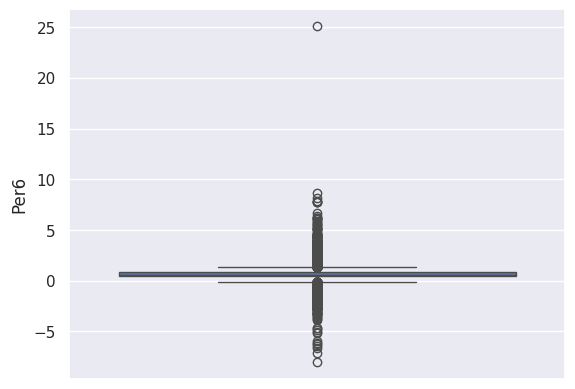

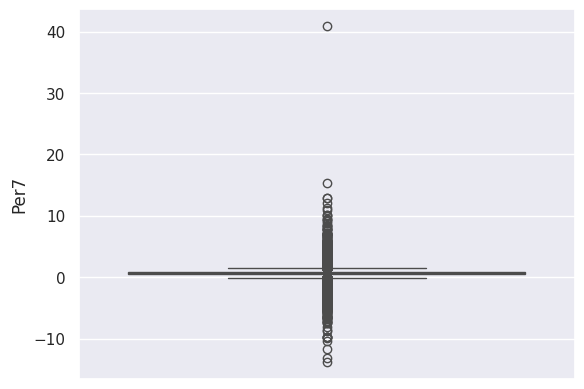

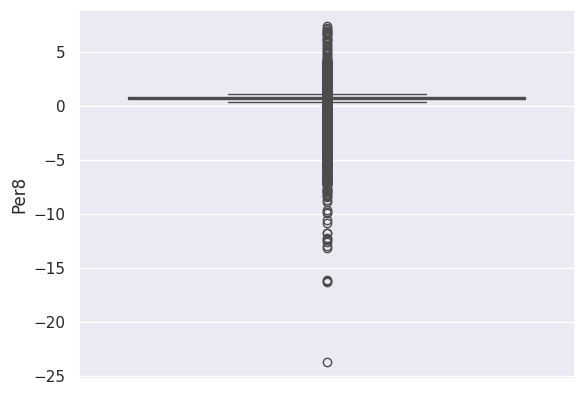

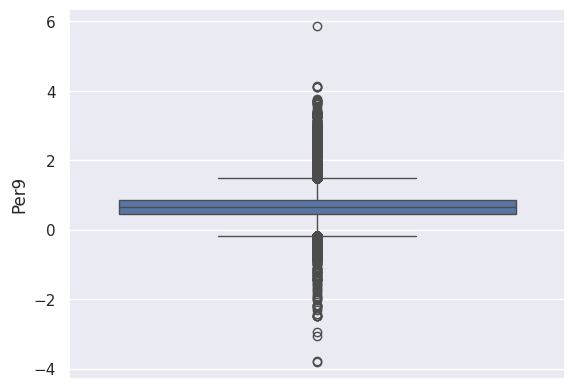

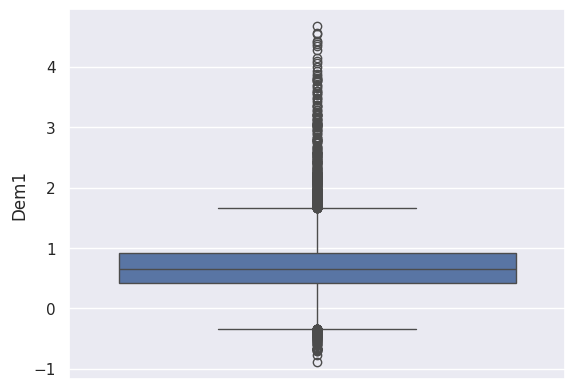

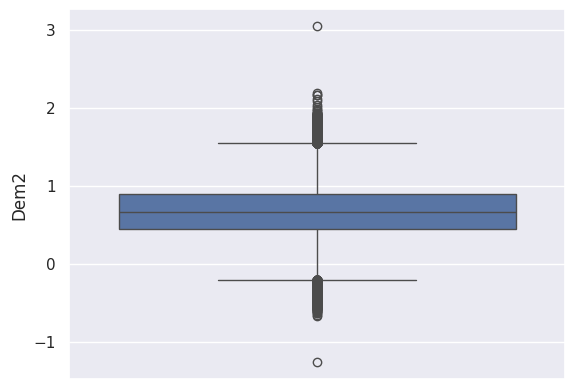

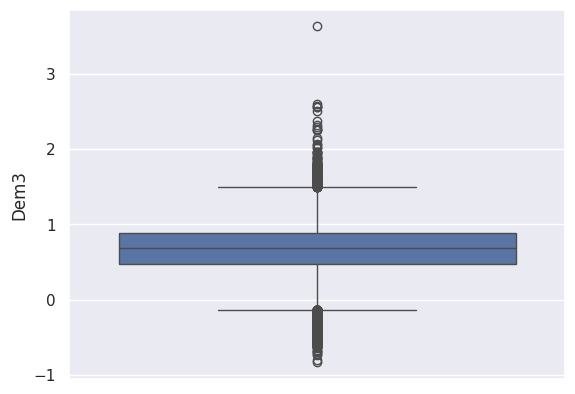

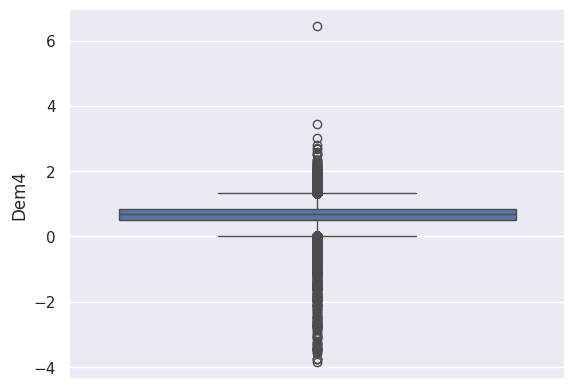

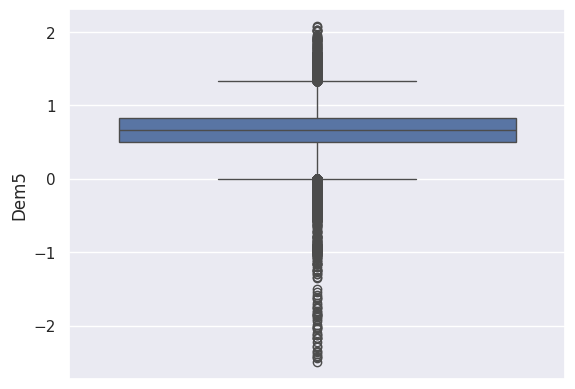

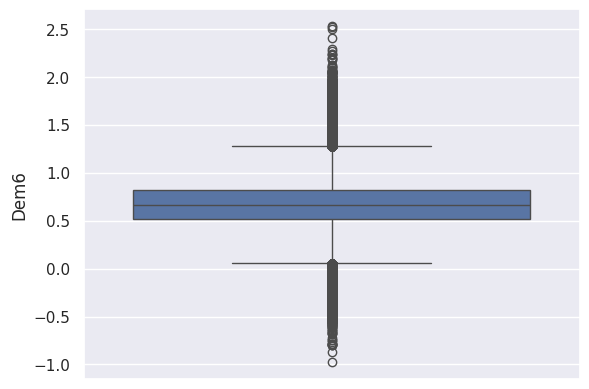

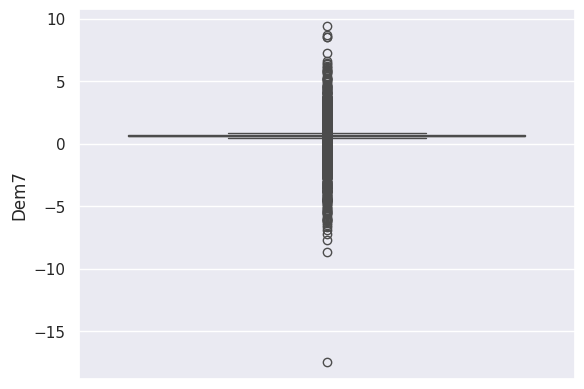

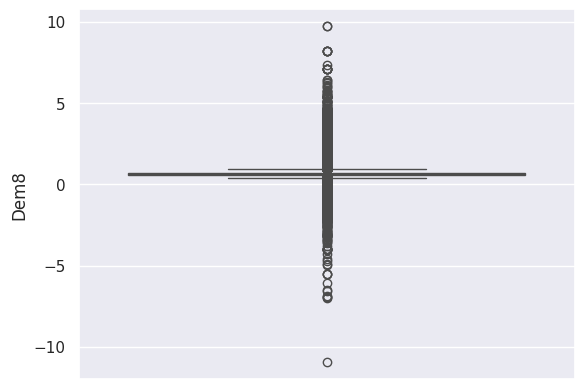

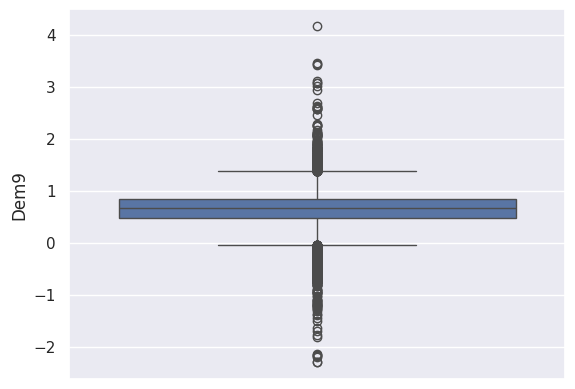

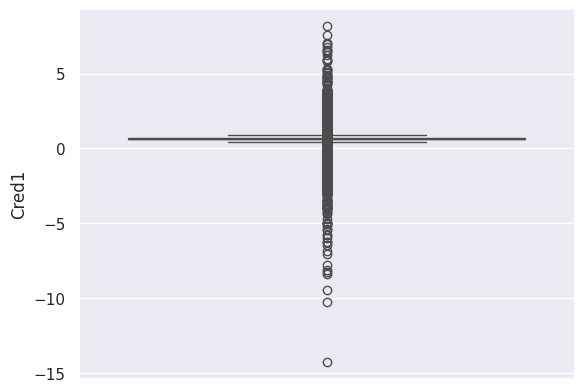

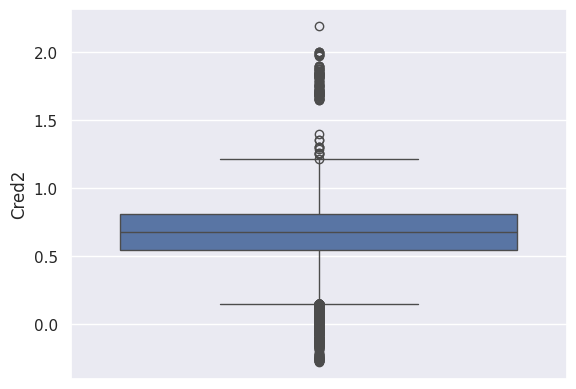

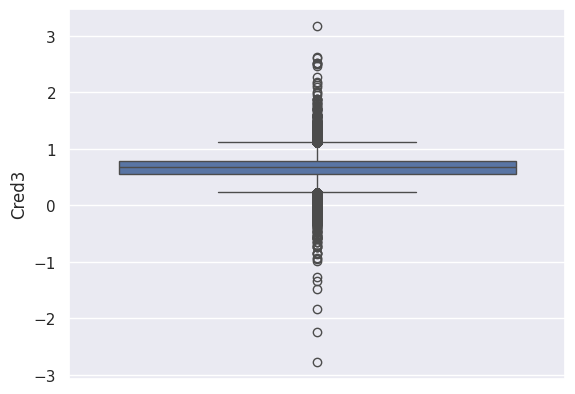

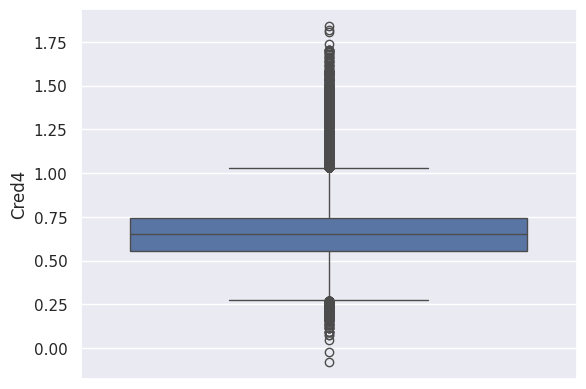

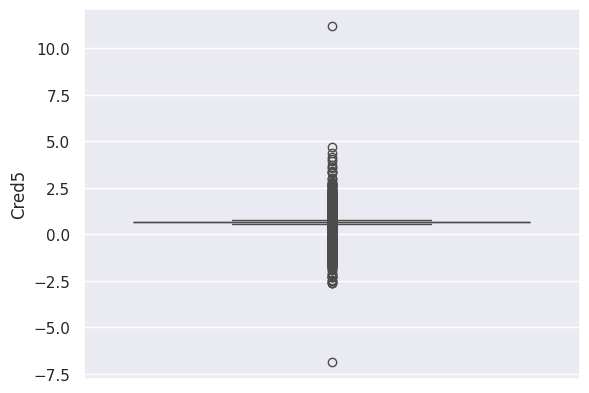

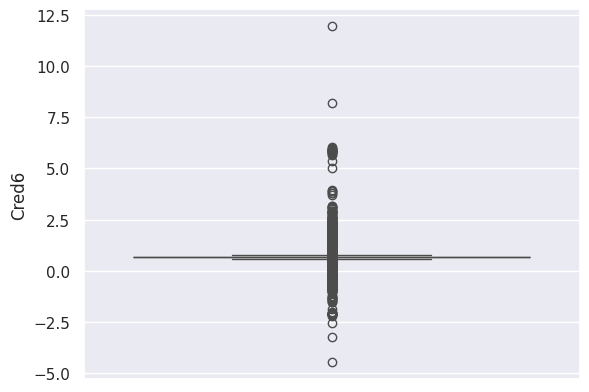

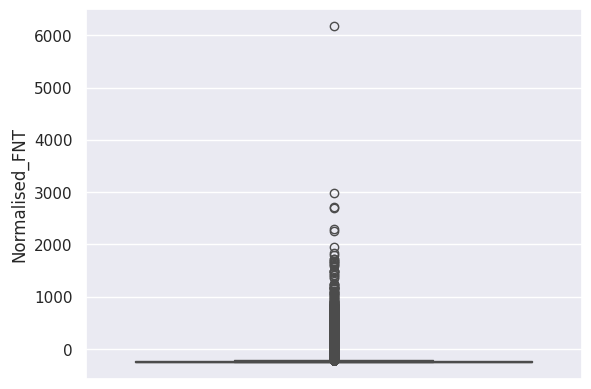

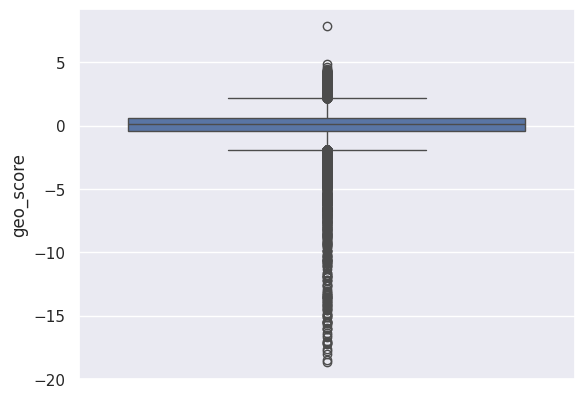

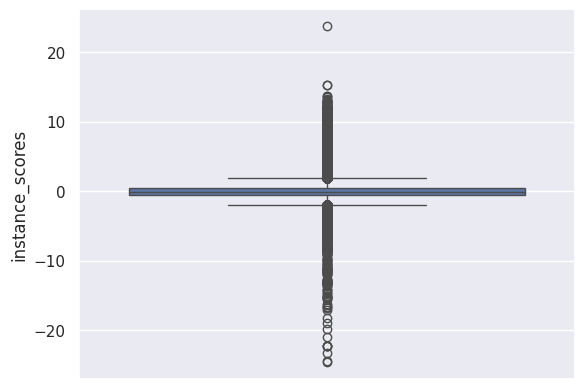

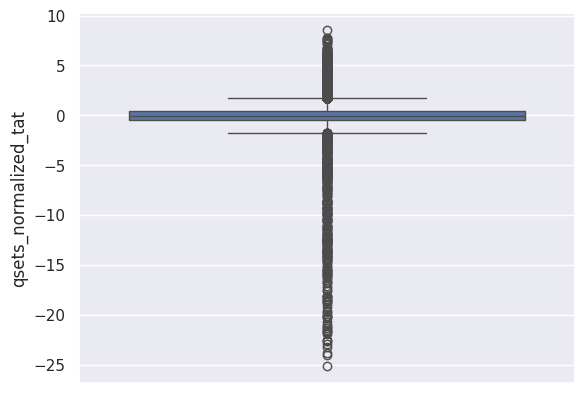

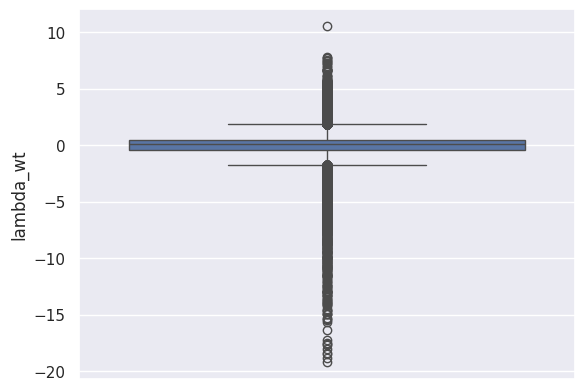

In [44]:
def boxplots(col):
  sns.boxplot(x[col])
  plt.show()
for i in list (x.select_dtypes (exclude=['object']).columns)[0:]:
               boxplots(i)

In [45]:
x.describe()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.666006,0.667701,0.666315,0.666687,0.666723,0.667378,0.666934,0.666279,0.666688,0.666576,...,0.666264,0.666755,0.666878,0.666566,0.666776,-227.954170,0.008908,-0.000123,0.001346,0.000350
std,0.654133,0.548305,0.506357,0.471956,0.461393,0.444573,0.415657,0.401546,0.366537,0.340436,...,0.202204,0.174204,0.160803,0.135762,0.111612,61.951661,0.997629,1.091488,0.850169,0.957957
min,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,-0.893333,...,-0.280000,-2.766667,-0.080000,-6.856667,-4.476667,-250.000000,-18.680000,-24.590000,-25.156000,-19.210000
25%,0.360000,0.470000,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,0.413333,...,0.546667,0.560000,0.556667,0.643333,0.650000,-248.617500,-0.400000,-0.540000,-0.480000,-0.430000
50%,0.670000,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,0.656667,...,0.680000,0.673333,0.650000,0.666667,0.670000,-244.510000,0.150000,-0.090000,-0.066000,0.050000
75%,1.103333,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,0.913333,...,0.813333,0.783333,0.746667,0.696667,0.693333,-230.750000,0.630000,0.450000,0.400000,0.490000
max,1.483333,8.020000,3.793333,6.163333,12.266667,25.100000,40.863333,7.336667,5.863333,4.673333,...,2.193333,3.173333,1.840000,11.203333,11.950000,6172.790000,7.850000,23.750000,8.540000,10.530000


In [46]:
y.value_counts(normalize = True)

Target
0.0    0.998271
1.0    0.001729
Name: proportion, dtype: float64

In [47]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 101, stratify = y)
# stratify=y - handling imbalance dataset

In [48]:
#the shape of the datasets
print('x_train shape',x_train.shape,'| x_test shape', x_test.shape,'| y_train shape', y_train.shape,'| y_test shape', y_test.shape)

x_train shape (182276, 29) | x_test shape (45569, 29) | y_train shape (182276,) | y_test shape (45569,)


In [49]:
#data is imbalnced to balanced the data smote is used
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
x_sm, y_sm = sm.fit_resample(x_train, y_train)

In [50]:
y_sm.value_counts()

Target
0.0    181961
1.0    181961
Name: count, dtype: int64

#Logistic Regression

In [51]:
#initializing logistic regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_sm,y_sm)

y_pred_log = log_reg.predict(x_test)
y_pred_log

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
#accuracy score and confusion matrix
from sklearn.metrics import accuracy_score , classification_report
score = accuracy_score(y_test,y_pred_log)
print(score)
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_log)
print(cnf_matrix)

0.9800083390023919
[[44590   900]
 [   11    68]]


In [53]:
print('training classification report ','\n',classification_report(y_test,y_pred_log))

training classification report  
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     45490
         1.0       0.07      0.86      0.13        79

    accuracy                           0.98     45569
   macro avg       0.54      0.92      0.56     45569
weighted avg       1.00      0.98      0.99     45569



#SVM

#Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(x_sm,y_sm)

y_pred_dt = dt.predict(x_test)
y_pred_dt

array([0., 0., 0., ..., 0., 0., 0.])

In [55]:
print(confusion_matrix(y_test,y_pred_dt))

[[45383   107]
 [   26    53]]


In [58]:
print('training classification report ','\n',classification_report(y_test,y_pred_dt))

training classification report  
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.33      0.67      0.44        79

    accuracy                           1.00     45569
   macro avg       0.67      0.83      0.72     45569
weighted avg       1.00      1.00      1.00     45569



#Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_sm,y_sm)
y_pred_rf = rf.predict(x_test)


In [62]:
score_ = accuracy_score(y_test,y_pred_rf)
print(score_)
print(confusion_matrix(y_test,y_pred_rf))

0.9993197129627598
[[45480    10]
 [   21    58]]


In [63]:
print ('testing classification report ','\n',classification_report(y_test, y_pred_rf))

testing classification report  
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.85      0.73      0.79        79

    accuracy                           1.00     45569
   macro avg       0.93      0.87      0.89     45569
weighted avg       1.00      1.00      1.00     45569



#KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier()

knn.fit(x_sm,y_sm)

y_pred_knn = knn.predict(x_test)

print(confusion_matrix(y_test,y_pred_knn))

[[45368   122]
 [   15    64]]


In [66]:
print('testing classification report ','\n',classification_report(y_test,y_pred_knn))

testing classification report  
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.34      0.81      0.48        79

    accuracy                           1.00     45569
   macro avg       0.67      0.90      0.74     45569
weighted avg       1.00      1.00      1.00     45569

